# Data Exploration/Preparation

This notebook will show you how to data for simple classification

You will often find yourself coming back to this notebook before any classification problem

We'll go over:

* Creating paths for our data
* Downloading the data
* Splitting the data into train/validation/test sets
* Structuring the data
* Exploring the data

In [1]:
from pathlib import Path
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import re

## Create Paths to our Data

This is a helper function to create paths

In [2]:
def create_path(pathname):
    Path(pathname).mkdir(parents=True, exist_ok=True)

In [ ]:
create_path('data/train')
create_path('data/valid')
create_path('models')
create_path('plots')

## Downloading the Data

We will be using the Stanford Pet dataset.

This dataset has 37 categories and about 200 images per class

You can see we are running the `curl` command, we can run any bash command by add a `!` in front of it


In [ ]:
!curl -o oxford-iiit-pet.tgz https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz

Notice the `%%capture` magic method this is to make sure the tar output isn't shown

In [ ]:
%%capture
!tar xvzf ./data/oxford-iiit-pet.tgz
! rm ./data/oxford-iiit-pet.tgz

In [4]:
df = pd.read_csv('data/classes.csv')
df.drop(['Unnamed: 1'],axis=1,inplace=True)

In [5]:
df.head(5) # first 5 classes

,classes
0,abyssinian
1,american_bulldog
2,american_pit_bull_terrier
3,basset_hound
4,beagle


In [6]:
labels = df.classes

for label in labels:
    create_path('data/train/'+label)
    create_path('data/valid/'+label)

In [7]:
pathlist = Path('data/oxford-iiit-pet/images/').glob('**/*.jpg')
files = list(pathlist)

## Splitting data into train and validation sets

The easiest way to split your data is to use sklearn's train_test_splt function

* 80% of the data will go to the train set
* 20% of the data will go to the validation set

In [ ]:
train_images, valid_images = train_test_split(files., test_size=0.2, random_state=42)

## Structuring the data

In [ ]:
def move_data(images, path):
    # loop through images
    for file in images:
        if file.is_file():
            # remove . jpg
            label = str(file.name).split('.')[0]
            # regex to remove numbers
            label = re.sub(r'\d+', '', label)
            # get rid of the last _
            label = label[:-1]
            # make file name lower case
            label = label.lower()
            # set new destination
            destination = Path(path+label+'/'+file.name)
            # move the file
            file.rename(destination) 

In [ ]:
move_data(train_images, 'data/train/')
move_data(valid_images, 'data/valid/')

## Exploring the data

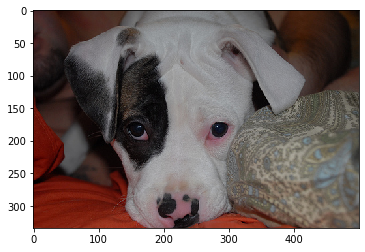

In [27]:
img = plt.imread('./data/train/american_bulldog/american_bulldog_180.jpg')
plt.imshow(img);

In [30]:
img.shape

(334, 500, 3)

In [31]:
def count_data(path):
    counts = []
    index = []
    for i, label in enumerate(labels):
        count = len(list(Path(path+label).glob('**/*')))
        counts.append(count)
        index.append(i)
    return counts, index

In [32]:
train_counts, index = count_data('data/train/')
valid_counts, index = count_data('data/valid/')

In [37]:
list(zip(train_counts, labels, index))[:5]

[(156, 'abyssinian', 0),
 (162, 'american_bulldog', 1),
 (155, 'american_pit_bull_terrier', 2),
 (165, 'basset_hound', 3),
 (157, 'beagle', 4)]

In [38]:
dataset = pd.DataFrame({'labels':labels,'count':train_counts, 'index':index})
dataset.set_index('index', inplace=False)
dataset.head(5)

,labels,count,index
0,abyssinian,156,0
1,american_bulldog,162,1
2,american_pit_bull_terrier,155,2
3,basset_hound,165,3
4,beagle,157,4


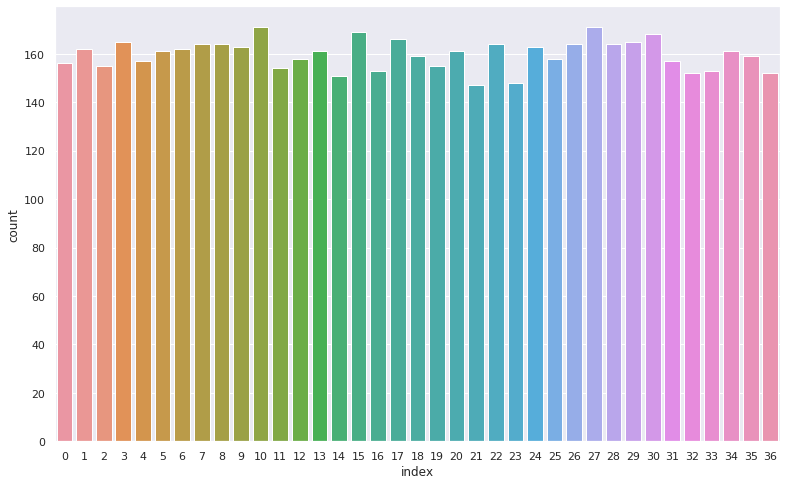

In [39]:
#sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(13,8)})
sns.barplot(x="index", y="count", data=dataset);

In [40]:
dataset = pd.DataFrame({'labels':labels,'count':valid_counts, 'index':index})
dataset.set_index('index', inplace=False)
dataset.head(5)

,labels,count,index
0,abyssinian,44,0
1,american_bulldog,38,1
2,american_pit_bull_terrier,45,2
3,basset_hound,35,3
4,beagle,43,4


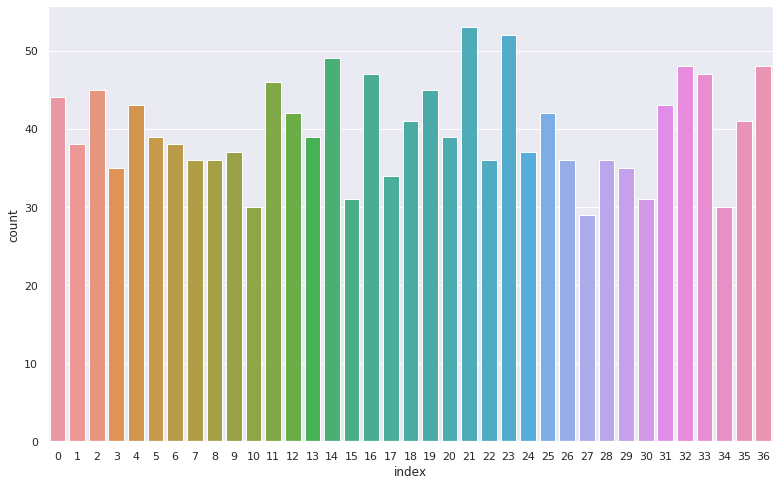

In [41]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(13,8)})
sns.barplot(x="index", y="count", data=dataset);